### Задача 1. Минимизация гладкой функции

1. Рассмотрим все ту же функцию из задания по линейной алгебре: f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2), но теперь уже на промежутке [1, 30]

2. В первом задании будем искать минимум этой функции на заданном промежутке с помощью scipy.optimize. Разумеется, в дальнейшем вы будете использовать методы оптимизации для более сложных функций, а f(x) мы рассмотрим как удобный учебный пример.

3. Напишите на Питоне функцию, вычисляющую значение f(x) по известному x. Будьте внимательны: не забывайте про то, что по умолчанию в питоне целые числа делятся нацело, и о том, что функции sin и exp нужно импортировать из модуля math.

4. Изучите примеры использования  scipy.optimize.minimize в документации Scipy (см. "Материалы")

5. Попробуйте найти минимум, используя стандартные параметры в функции  scipy.optimize.minimize (т.е. задав только функцию и начальное приближение). Попробуйте менять начальное приближение и изучить, меняется ли результат. 

6. кажите в scipy.optimize.minimize в качестве метода BFGS (один из самых точных в большинстве случаев градиентных методов оптимизации), запустите из начального приближения x=2. Градиент функции при этом указывать не нужно – он будет оценен численно. Полученное значение функции в точке минимума - ваш первый ответ по заданию 1, его надо записать с точностью до 2 знака после запятой.

7. Теперь измените начальное приближение на x=30. Значение функции в точке минимума - ваш второй ответ по заданию 1, его надо записать через пробел после первого, с точностью до 2 знака после запятой.

8. Стоит обдумать полученный результат. Почему ответ отличается в зависимости от начального приближения? Если нарисовать график функции (например, как это делалось в видео, где мы знакомились с Numpy, Scipy и Matplotlib), можно увидеть, в какие именно минимумы мы попали. В самом деле, градиентные методы обычно не решают задачу глобальной оптимизации, поэтому результаты работы ожидаемые и вполне корректные.

In [8]:
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
import math as mt

Рассмотрим все ту же функцию из задания по линейной алгебре: f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2), но теперь уже на промежутке [1, 30]

In [47]:
def f(x):
    return mt.sin(x / 5) * mt.exp(x / 10) + 5 * mt.exp(-x / 2)

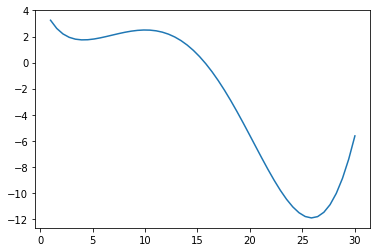

In [68]:
# Нарисуем нашу функцию на промежутке от 1 до 30
x = np.linspace(1, 30, 50)
y = [f(i) for i in x]
plt.plot(x, y)

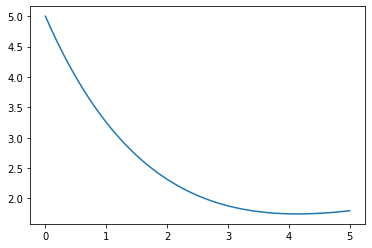

In [63]:
# Нарисуем нашу функцию на промежутке 0 до 5
x = np.linspace(0, 5, 50)
y = [f(i) for i in x]
plt.plot(x, y)

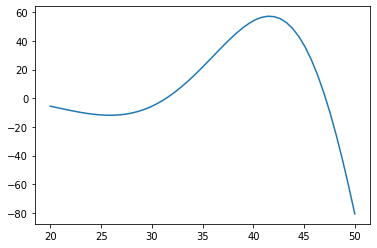

In [64]:
# Нарисуем нашу функцию на промежутке 20 до 50
x = np.linspace(20, 50, 50)
y = [f(i) for i in x]
plt.plot(x, y)

In [65]:
# Поиграемся с разными начальными значениями
minfx = scipy.optimize.minimize(f, 4)
print(minfx)

      fun: 1.7452682904133416
 hess_inv: array([[5.93460225]])
      jac: array([-5.1856041e-06])
  message: 'Optimization terminated successfully.'
     nfev: 10
      nit: 4
     njev: 5
   status: 0
  success: True
        x: array([4.13625735])


In [66]:
#Вычислим значения метода BFGS в точках х = 2, х = 30
# Согласно графику найдём значения (!) локальных (!) минимумов функции
minfx1 = scipy.optimize.minimize(f, 2, method='BFGS')
minfx2 = scipy.optimize.minimize(f, 30, method='BFGS')

In [67]:
# Запишем ответ в файл quiz2_1
ans = [round(minfx1.fun, 2), round(minfx2.fun, 2)]
file_obj = open('quiz2_1', 'w')
file_obj.writelines(i + ' ' for i in map(str, ans))
file_obj.close()

### Задача 2. Глобальная оптимизация

1. Теперь попробуем применить к той же функции f(x) метод глобальной оптимизации — дифференциальную эволюцию.

2. Изучите документацию и примеры использования функции scipy.optimize.differential_evolution.

3. Обратите внимание, что границы значений аргументов функции представляют собой список кортежей (list, в который помещены объекты типа tuple). Даже если у вас функция одного аргумента, возьмите границы его значений в квадратные скобки, чтобы передавать в этом параметре список из одного кортежа, т.к. в реализации scipy.optimize.differential_evolution длина этого списка используется чтобы определить количество аргументов функции.

4. Запустите поиск минимума функции f(x) с помощью дифференциальной эволюции на промежутке [1, 30]. Полученное значение функции в точке минимума - ответ в задаче 2. Запишите его с точностью до второго знака после запятой. В этой задаче ответ - только одно число.

5. Заметьте, дифференциальная эволюция справилась с задачей поиска глобального минимума на отрезке, т.к. по своему устройству она предполагает борьбу с попаданием в локальные минимумы.

6. Сравните количество итераций, потребовавшихся BFGS для нахождения минимума при хорошем начальном приближении, с количеством итераций, потребовавшихся дифференциальной эволюции. При повторных запусках дифференциальной эволюции количество итераций будет меняться, но в этом примере, скорее всего, оно всегда будет сравнимым с количеством итераций BFGS. Однако в дифференциальной эволюции за одну итерацию требуется выполнить гораздо больше действий, чем в BFGS. Например, можно обратить внимание на количество вычислений значения функции (nfev) и увидеть, что у BFGS оно значительно меньше. Кроме того, время работы дифференциальной эволюции очень быстро растет с увеличением числа аргументов функции.

In [90]:
def f(x):
    return mt.sin(x / 5) * mt.exp(x / 10) + 5 * mt.exp(-x / 2)

In [91]:
ans1 = []

In [92]:
# scipy.optimize.differential_evolution
minfx = scipy.optimize.differential_evolution(f, [(1, 30)])
ans1.append(round(minfx.fun, 2))
file_obj = open('quiz2_2', 'w')
file_obj.writelines(i + ' ' for i in map(str, ans1))
file_obj.close()

### Задача 3. Минимизация негладкой функции

1. Теперь рассмотрим функцию h(x) = int(f(x)) на том же отрезке [1, 30], т.е. теперь каждое значение f(x) приводится к типу int и функция принимает только целые значения.

2. Такая функция будет негладкой и даже разрывной, а ее график будет иметь ступенчатый вид. Убедитесь в этом, построив график h(x) с помощью matplotlib.

3. Попробуйте найти минимум функции h(x) с помощью BFGS, взяв в качестве начального приближения x=30. Получившееся значение функции – ваш первый ответ в этой задаче.

4. Теперь попробуйте найти минимум h(x) на отрезке [1, 30] с помощью дифференциальной эволюции. Значение функции h(x) в точке минимума – это ваш второй ответ в этом задании. Запишите его через пробел после предыдущего.

5. Обратите внимание на то, что полученные ответы различаются. Это ожидаемый результат, ведь BFGS использует градиент (в одномерном случае – производную) и явно не пригоден для минимизации рассмотренной нами разрывной функции. Попробуйте понять, почему минимум, найденный BFGS, именно такой (возможно в этом вам поможет выбор разных начальных приближений).

6. Выполнив это задание, вы увидели на практике, чем поиск минимума функции отличается от глобальной оптимизации, и когда может быть полезно применить вместо градиентного метода оптимизации метод, не использующий градиент. Кроме того, вы попрактиковались в использовании библиотеки SciPy для решения оптимизационных задач, и теперь знаете, насколько это просто и удобно.

In [76]:
def h(x):
    return int(f(x))

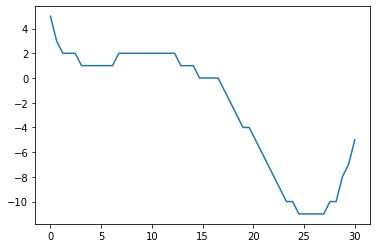

In [78]:
x = np.linspace(0, 30, 50)
y = [h(i) for i in x]
plt.plot(x, y)

In [86]:
ans2 = []

In [87]:
minfx = scipy.optimize.minimize(h, 30, method='BFGS')
ans2.append(round(minfx.fun,2))
ans2

[-5]

In [88]:
minfx1 = scipy.optimize.differential_evolution(h, [(1, 30)])
ans2.append(round(minfx1.fun, 2))
ans2

[-5, -11.0]

In [89]:
file_obj = open('quiz2_3', 'w')
file_obj.writelines(i + ' ' for i in map(str, ans2))
file_obj.close()